In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [495]:
df = pd.read_csv('IPL2016.csv')
df.head()

,Unnamed: 0,overall_sr,won
0,1,168.817204,1
1,2,165.432099,0
2,3,121.568627,0
3,4,149.541284,1
4,5,151.898734,0


In [496]:
def normal(orig,x):
    return (orig-np.min(x))/(np.max(x)-np.min(x))

In [497]:
def unnormal(orig,x):
    return orig*(np.max(x)-np.min(x))+np.min(x)

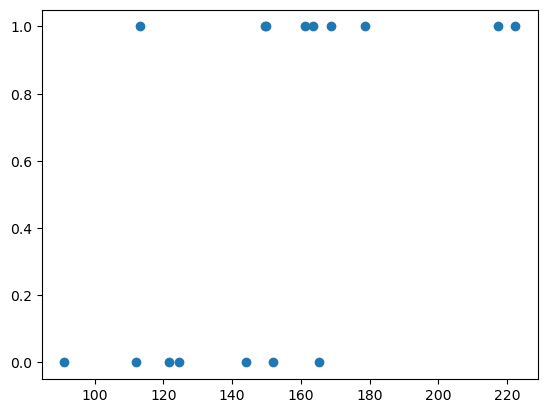

In [498]:
x = np.array(df['overall_sr']).reshape(-1,1)
x_normal = normal(x,x)
y = np.array(df['won']).reshape(-1,1)
plt.scatter(x,y)

In [499]:
w = np.zeros((x.shape[1],1))
b = 0.0

In [500]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [501]:
def pred(x):
    return sigmoid(np.dot(x,w)+b)

In [502]:
def loss(x,y):
    y_pred = pred(x)
    return -np.mean(np.multiply(y,np.log(y_pred))+np.multiply((1-y),np.log(1-y_pred)))

In [503]:
epochs = 1000
lr = 1

for _ in range(epochs):
        y_pred = pred(x_normal)
        dw = -np.mean(np.multiply(x_normal, (y - y_pred)))
        db = -np.mean(y - y_pred)
        w-=dw*lr
        b-=db*lr
print("loss =",loss(x_normal,y))


loss = 0.48779192165002677


In [504]:
print(w,b)
print("50% at =",unnormal((-b/w)[0][0],x))


[[6.79726185]] -2.7113102140493615
50% at = 143.53119657647682


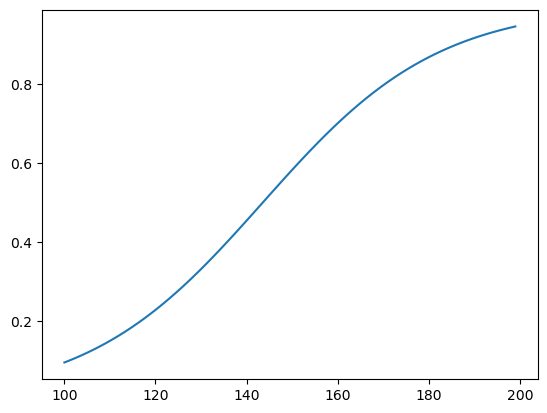

In [505]:
to = np.arange(100,200).reshape(-1,1)
plt.plot(to, pred(normal(to,x)))